## Problems: Path with maximum probability

LeetCode: 1514

https://leetcode.com/problems/path-with-maximum-probability/description/

You are given an undirected weighted graph of n nodes (0-indexed), represented by an edge list where edges[i] = [a, b] is an undirected edge connecting the nodes a and b with a probability of success of traversing that edge succProb[i].

Given two nodes start and end, find the path with the maximum probability of success to go from start to end and return its success probability.

If there is no path from start to end, return 0. Your answer will be accepted if it differs from the correct answer by at most 1e-5.

 

Example 1:

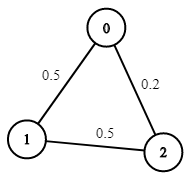

    Input: n = 3, edges = [[0,1],[1,2],[0,2]], succProb = [0.5,0.5,0.2], start = 0, end = 2
    Output: 0.25000
    Explanation: There are two paths from start to end, one having a probability of success = 0.2 and the other has 0.5 * 0.5 = 0.25.
Example 2:



    Input: n = 3, edges = [[0,1],[1,2],[0,2]], succProb = [0.5,0.5,0.3], start = 0, end = 2
    Output: 0.30000
Example 3:



    Input: n = 3, edges = [[0,1]], succProb = [0.5], start = 0, end = 2
    Output: 0.00000
    Explanation: There is no path between 0 and 2.
 

Constraints:

    2 <= n <= 10^4
    0 <= start, end < n
    start != end
    0 <= a, b < n
    a != b
    0 <= succProb.length == edges.length <= 2*10^4
    0 <= succProb[i] <= 1
    There is at most one edge between every two nodes.

## Approach: Dijkstra's Algorithm

Dijkstra's algorithm takes into account the weights of the edges and always guarantees to find the highest probability from the source node to any other node in the graph.

We start from the starting node start, and consider its neighbors one by one, updating the probability to each neighboring node nxt_node if the probability of reaching nxt_node through the current node cur_node is higher than the previous stored probability of reaching nxt_node (by other paths). In order to always select the node with the highest reaching probability, we use a priority queue pq to store the nodes to visit, where the node with the highest probability of being reached from the starting node has the highest priority.



In [3]:
import heapq
def maxProbability(n, edges, succProb, start_node, end_node):
    graph = {}
    for i, (s,d) in enumerate(edges):
        if s not in graph:
            graph[s] = []
        if d not in graph:
            graph[d] = []
        graph[s].append((succProb[i], d))
        graph[d].append((succProb[i], s))

    maxProb = [0.0] * n
    maxProb[start_node] = 1.0
    maxHeap = []
    heapq.heappush(maxHeap, (-1.0, start_node))
    while maxHeap:
        currentProb, currentNode = heapq.heappop(maxHeap)
        if currentNode == end_node:
            return -currentProb
        if -currentProb < maxProb[currentNode]:
            continue
        if currentNode not in graph:
            continue
        for nextProb, nextNode in graph[currentNode]:
            if -nextProb*currentProb > maxProb[nextNode]:
                maxProb[nextNode] = -nextProb*currentProb
                heapq.heappush(maxHeap, (-maxProb[nextNode], nextNode))
    return 0.0

In [4]:
n = 3
edges = [[0,1],[1,2],[0,2]]
succProb = [0.5,0.5,0.2]
start = 0
end = 2
maxProbability(n, edges, succProb, start, end)

0.25

In [5]:
n = 3
edges = [[0,1],[1,2],[0,2]]
succProb = [0.5,0.5,0.3]
start = 0
end = 2
maxProbability(n, edges, succProb, start, end)

0.3